In [6]:
#! usr/bin/env python3
import praw
import pandas as pd
from datetime import datetime as dt
import time, calendar
import psycopg2
import time
import pymongo
starttime=time.time()
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import scipy.stats as stats
from scipy.stats import linregress




In [ ]:

def simple_reddit_scraper():
    reddit = praw.Reddit(client_id='YOUR CLIENT_ID', \
                     client_secret='YOUR CLIENT_SECRET', \
                     user_agent='Sub Scraper', \
                     username='YOUR USERNAME HERE', \
                     password='YOUR PASSWORD HERE')

    subreddit = reddit.subreddit('all')
    top_subreddit = subreddit.hot(limit=10000)

# Use list comprehension to create a list of lists representing each post
    df_rows = [[submission.id, submission.title, submission.selftext, submission.score, submission.url, submission.num_comments, dt.utcfromtimestamp(submission.created)] for submission in top_subreddit]
# Create df using rows, set column titles
    df = pd.DataFrame(df_rows, columns=['ID', 'Title', 'Body', 'Score', 'URL', 'Comments', 'Created'])
    return df

# scraped_df = simple_reddit_scraper()


In [58]:
# Run this while loop to grab a new df selection each 60 seconds and then append it to the original scraped dataframe
while True:
    dataframe = simple_reddit_scraper()
    scraped_df = pd.concat([scraped_df, dataframe], join  = 'outer', axis = 0, ignore_index = True)
    time.sleep(60.0 - ((time.time() - starttime) % 60.0))

KeyboardInterrupt: 

In [241]:
# Final DF and analyses
# Here is the uncleaned dataframe
print(scraped_df)
cleaned_final = scraped_df.drop_duplicates()
# drop_duplicates
cleaned_final

NameError: name 'scraped_df' is not defined

In [4]:
file = "df_reddit.csv"
cleaned_final.to_csv(file, sep='\t', encoding='utf-8')


NameError: name 'cleaned_final' is not defined

In [5]:
dataframereddit1 = pd.read_csv('df_reddit.csv', sep = '\t', encoding ='utf-8')
dataframereddit1



,Unnamed: 0,ID,Title,Body,Score,URL,Comments,Created
0,0,ejl023,Perfect timing,NaN,17413,https://v.redd.it/ayzsxc2tfm841,315,2020-01-04 04:14:06
1,1,ejk48x,TIL Research shows that children as young as 4...,NaN,23802,https://news.yale.edu/2018/07/23/even-4-year-o...,1116,2020-01-04 03:14:08
2,2,ejk3qx,In The Lego Movie (2014) Benny the spaceman ha...,NaN,18413,https://i.redd.it/1yf0ofvx4m841.jpg,264,2020-01-04 03:13:11
3,3,ejjmjr,Recommendations!,NaN,24502,https://i.redd.it/j6e4ge34zl841.jpg,101,2020-01-04 02:40:32
4,4,ejkcib,New Years photobomb!,NaN,11507,https://i.redd.it/1dashplv7m841.jpg,173,2020-01-04 03:29:40
...,...,...,...,...,...,...,...,...
6268834,7172467,el49up,"umm, oopsie!",NaN,344,https://i.redd.it/rldx31cqi9941.jpg,11,2020-01-07 09:51:27
6268835,7172468,elbkks,So do you want the green meth or the blue meth?,NaN,43,https://i.redd.it/2wuua1bfzc941.jpg,4,2020-01-07 21:30:22
6268836,7172469,elb5dc,Ah yes happened yesterday,NaN,45,https://i.redd.it/i82z1sx7sc941.jpg,1,2020-01-07 20:49:58
6268837,7172471,elbngo,Me Trying to sleep,NaN,40,https://i.redd.it/lflndbnq0d941.png,1,2020-01-07 21:37:44


In [30]:
cleaned_final.Created.min()
tester = scraped_df.copy()


,ID,Title,Body,Score,URL,Comments,Created
0,ejl023,Perfect timing,,17413,https://v.redd.it/ayzsxc2tfm841,315,2020-01-04 04:14:06
1,ejk48x,TIL Research shows that children as young as 4...,,23802,https://news.yale.edu/2018/07/23/even-4-year-o...,1116,2020-01-04 03:14:08
2,ejk3qx,In The Lego Movie (2014) Benny the spaceman ha...,,18413,https://i.redd.it/1yf0ofvx4m841.jpg,264,2020-01-04 03:13:11
3,ejjmjr,Recommendations!,,24502,https://i.redd.it/j6e4ge34zl841.jpg,101,2020-01-04 02:40:32
4,ejkcib,New Years photobomb!,,11507,https://i.redd.it/1dashplv7m841.jpg,173,2020-01-04 03:29:40
...,...,...,...,...,...,...,...
8882,ejd5qr,Damn water mark,,4115,https://i.redd.it/i4zs2usy8j841.png,15,2020-01-03 17:30:46
8883,ejqb2i,Good luck out there folks.,,77,https://i.redd.it/4foif6glco841.jpg,15,2020-01-04 10:39:38
8884,ejmqst,Who’s ready to get drafted,,157,https://i.redd.it/7qk9aauj1n841.jpg,1,2020-01-04 06:15:58
8885,ejpe48,Can i get an F,,94,https://i.redd.it/ndqbir280o841.jpg,7,2020-01-04 09:30:18


In [58]:
dataframereddit.drop_duplicates(subset = 'ID')
# dataframeredditedit.drop_duplicates(subset = 'ID')
# dataframereddit.drop('Unnamed: 0')
dataframereddit.sort_values(by=['Score'], ascending = False)


,Unnamed: 0,ID,Title,Body,Score,URL,Comments,Created
3111129,3511327,ek33p5,We laugh at dogs getting excited when they hea...,NaN,151464,https://www.reddit.com/r/Showerthoughts/commen...,1069,2020-01-05 05:50:50
3103519,3502461,ek33p5,We laugh at dogs getting excited when they hea...,NaN,151428,https://www.reddit.com/r/Showerthoughts/commen...,1069,2020-01-05 05:50:50
3095977,3493529,ek33p5,We laugh at dogs getting excited when they hea...,NaN,151411,https://www.reddit.com/r/Showerthoughts/commen...,1069,2020-01-05 05:50:50
3088792,3484707,ek33p5,We laugh at dogs getting excited when they hea...,NaN,151370,https://www.reddit.com/r/Showerthoughts/commen...,1069,2020-01-05 05:50:50
3081076,3474738,ek33p5,We laugh at dogs getting excited when they hea...,NaN,151333,https://www.reddit.com/r/Showerthoughts/commen...,1069,2020-01-05 05:50:50
...,...,...,...,...,...,...,...,...
2136753,2428706,ekd0cn,Boys are wierd.,NaN,36,https://i.redd.it/h7gwrrebpy841.jpg,1,2020-01-05 21:28:46
2128532,2419145,ekcyyf,I think I need more off ;)🤔 (f),NaN,36,https://i.redd.it/eyfc7a2moy841.jpg,10,2020-01-05 21:24:52
2178974,2477429,ekd68g,So I am not cumming back once I die?,NaN,36,https://i.redd.it/ys62a6t2sy841.jpg,3,2020-01-05 21:44:15
2225666,2530650,ekddv9,"This is not okay, stay strong Australia",NaN,36,https://i.redd.it/8193s9qkvy841.jpg,3,2020-01-05 22:03:52


In [2]:
# Cleaning work
work = dataframereddit.copy()
work.drop(['Body', 'URL', 'Unnamed: 0', 'Title'], axis=1, inplace = True)
work.dropna(axis=0, how='any', thresh=None, subset=['Score', 'Comments', 'Created'] , inplace=True)
work

NameError: name 'dataframereddit' is not defined

In [333]:
work

,ID,Score,Comments,Created
3111129,ek33p5,151464,1069,2020-01-05 05:50:50
4887766,ekehvg,146999,2463,2020-01-05 23:39:27
4797052,ekcm64,138583,3878,2020-01-05 20:48:52
2177414,ejwxed,133345,7105,2020-01-04 21:59:08
6266062,el1g2a,125388,1690,2020-01-07 06:23:25
...,...,...,...,...
2105029,ekcnk5,38,0,2020-01-05 20:52:53
650877,ejxa7x,37,3,2020-01-04 22:32:35
595840,ejx1pb,37,3,2020-01-04 22:10:19
595838,ejx1yl,37,2,2020-01-04 22:10:56


In [117]:
# sort = df.sort_values(by=['col1']) 
work.drop_duplicates(subset = 'ID', keep = 'last', inplace = True)
# work

,ID,Score,Comments,Created
384,ejh7ro,4205,121,2020-01-03 23:52:23
2088,ejhkfr,1110,11,2020-01-04 00:16:39
3263,eji50e,576,13,2020-01-04 00:56:52
3455,ejm307,163,5,2020-01-04 05:29:20
3488,ej5zei,12760,142,2020-01-03 07:04:51
...,...,...,...,...
6268834,el49up,344,11,2020-01-07 09:51:27
6268835,elbkks,43,4,2020-01-07 21:30:22
6268836,elb5dc,45,1,2020-01-07 20:49:58
6268837,elbngo,40,1,2020-01-07 21:37:44


In [1]:
# Here we show a histogram by day 
work.sort_values(by=['Score'], ascending = False, inplace = True)
data = work['Created']
plt.figure(figsize=([20,10]))
# work['Created'].hist(bins = 30)

entries, edges, _ = plt.hist(data, bins=120)


# calculate bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# draw errorbars, use the sqrt error. You can use what you want there
# poissonian 1 sigma intervals would make more sense
plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.')

plt.show()


NameError: name 'work' is not defined

,Comments
5291952,101
6262853,101
4882143,101
6262319,101
4883251,101
...,...
573235,15918
1270255,20735
226863,21529
452269,31235


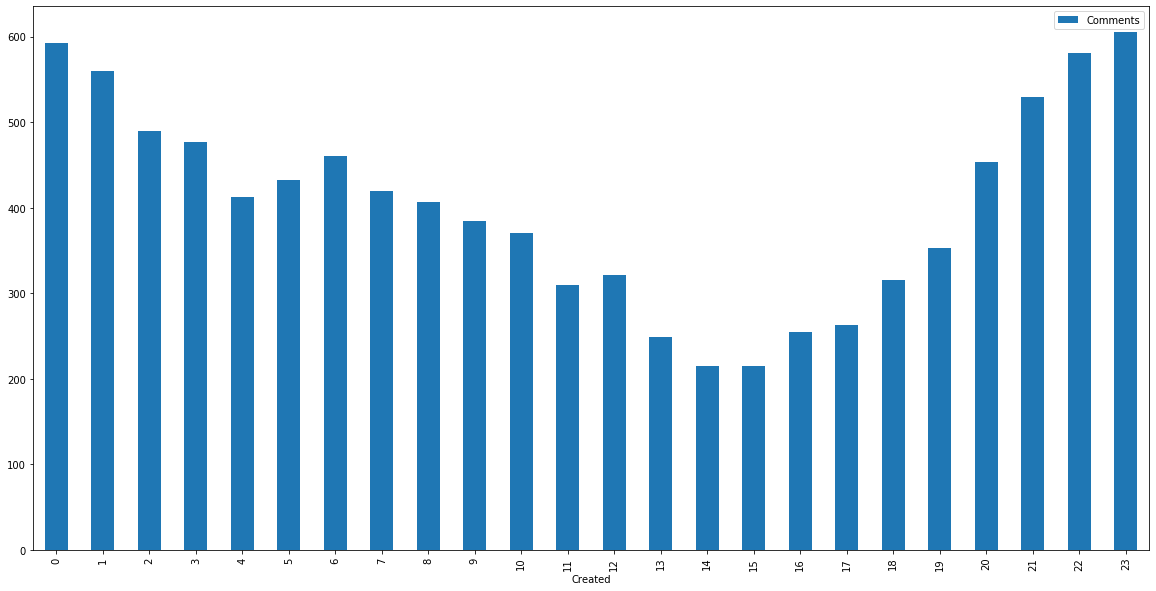

In [231]:
# Comments analysis
commentwork = work.copy()

commentwork = commentwork[commentwork['Comments'] > 100]
# x = work['Score']
commentwork['Created'] = pd.to_datetime(work['Created'], errors='coerce')


commentwork.drop(['ID', 'Score', 'Created'], axis=1, inplace = True)


commentwork.groupby(work["Created"].dt.hour).count().plot( kind="bar", figsize = [20,10])

commentwork.sort_values(by=['Comments'], inplace = True)

commentwork

,Score
3111129,151464
4887766,146999
4797052,138583
2177414,133345
6266062,125388
...,...
6180510,751
632083,751
4973040,751
5507627,751


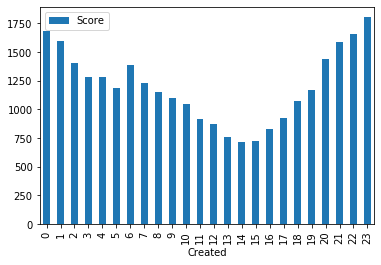

In [178]:
# Score Analysis
scorework = work.copy()

scorework = scorework[scorework['Score'] > 750]
# x = work['Score']
scorework['Created'] = pd.to_datetime(work['Created'], errors='coerce')

scorework.drop(['ID', 'Comments', 'Created'], axis=1, inplace = True)
# work.drop[['']]
scorework.groupby(work["Created"].dt.hour).count().plot( kind="bar")
scorework

In [283]:
study_df = work.copy()
study_df['300+ comments?'] = study_df['Comments'].apply(lambda x: 1 if x > 300 else 0)
# df['Normal'] = df.Speed.apply(lambda x: 1 if x == "Normal" else 0)

df_high_comments = study_df[study_df['Comments'] > 300] 
df_high_comments

,ID,Score,Comments,Created,300+ comments?
3111129,ek33p5,151464,1069,2020-01-05 05:50:50,1
4887766,ekehvg,146999,2463,2020-01-05 23:39:27,1
4797052,ekcm64,138583,3878,2020-01-05 20:48:52,1
2177414,ejwxed,133345,7105,2020-01-04 21:59:08,1
6266062,el1g2a,125388,1690,2020-01-07 06:23:25,1
...,...,...,...,...,...
2490116,ekc0yj,99,752,2020-01-05 19:44:43,1
4887924,ekrkol,97,2677,2020-01-06 17:04:16,1
805336,ejxydi,94,644,2020-01-04 23:30:25,1
3002887,ekgc53,93,366,2020-01-06 01:51:51,1


In [263]:
df_high_score = study_df[study_df['Score']>5000]
# Is there a significant relationship between high score and high amount of comments
stats.ttest_rel(df_high_score.Score.sample(665), df_high_comments.Comments)


Ttest_relResult(statistic=21.449643161029304, pvalue=5.997067404093111e-78)

,ID,Score,Comments,Created,300+ comments?
3111129,ek33p5,151464,1069,2020-01-05 05:50:50,1
4887766,ekehvg,146999,2463,2020-01-05 23:39:27,1
4797052,ekcm64,138583,3878,2020-01-05 20:48:52,1
2177414,ejwxed,133345,7105,2020-01-04 21:59:08,1
6266062,el1g2a,125388,1690,2020-01-07 06:23:25,1


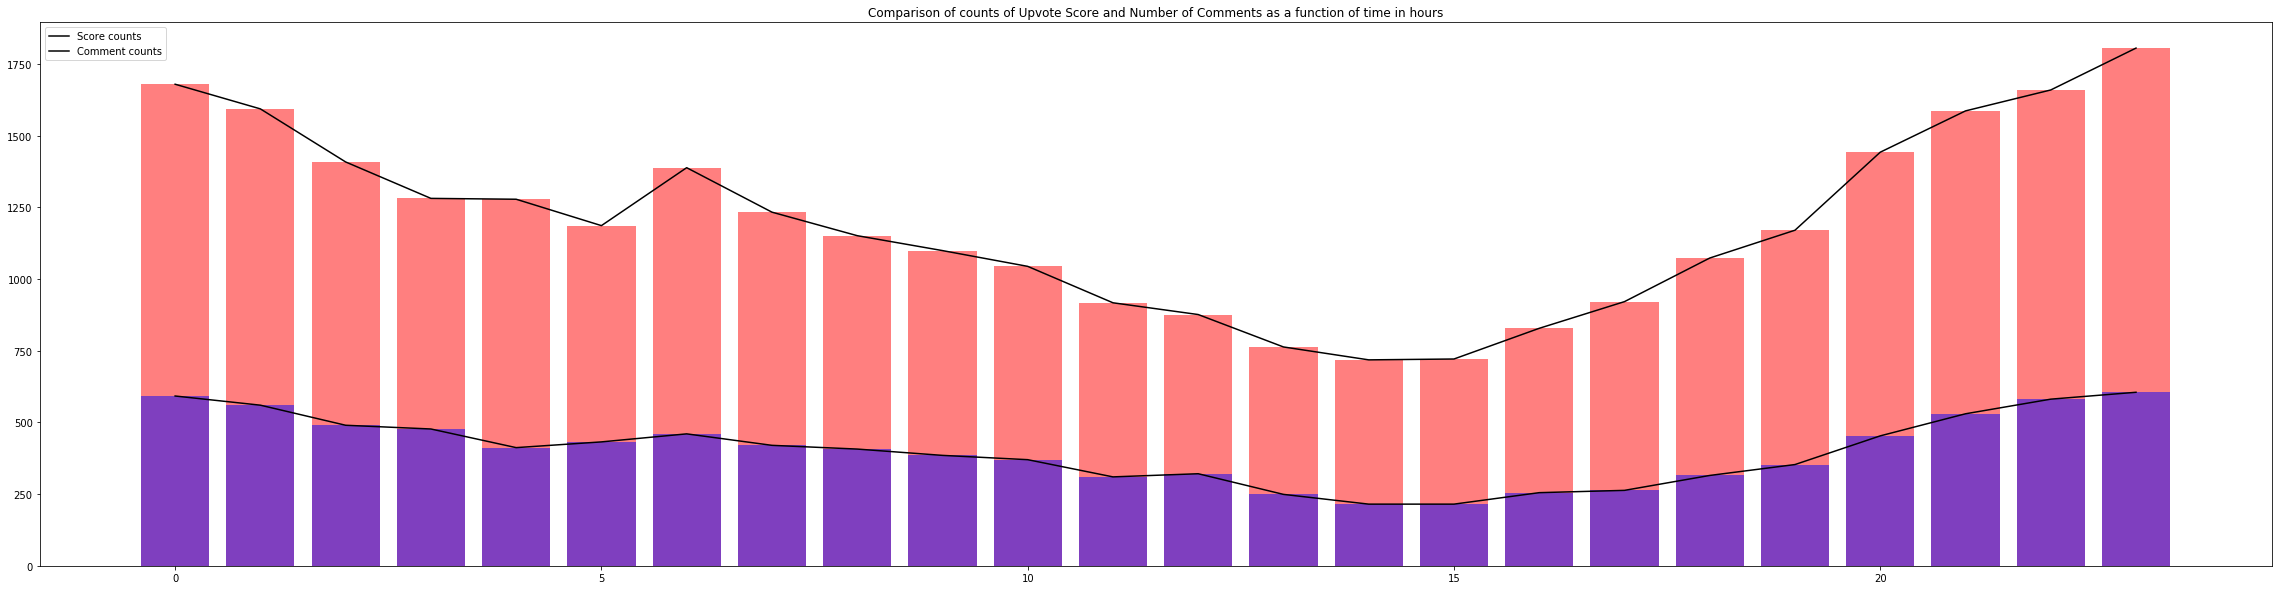

In [395]:
# df_high_score.groupby(df_high_score["Created"].dt.hour).count().plot( kind="bar")
# commentwork.groupby(work["Created"].dt.hour).count().plot( kind="bar", figsize = [20,10], stacked = True)
# scorework.groupby(work["Created"].dt.hour).count().plot( kind="bar", figsize = [20,10], stacked = True)


test_df = commentwork.groupby(work["Created"].dt.hour).count()
test_df['score']= scorework.groupby(work["Created"].dt.hour).count()
test_df['Created'] = list(range(0,24))
fig, ax = plt.subplots(figsize=([40,10]))
plt.plot(test_df.Created, test_df.score, color = 'black', alpha = 1, label = 'Score counts')
plt.plot(test_df.Created, test_df.Comments,color = 'black',alpha = 1, label = 'Comment counts')
rects1 = ax.bar(test_df.Created, test_df.score, color='r', alpha = .5)
rects2 = ax.bar(test_df.Created, test_df.Comments, color = 'b', alpha= .5)
# plt.figur(figsize=([40,10]))

ax.legend()
ax.set_title('Comparison of counts of Upvote Score and Number of Comments as a function of time in hours')
plt.show()


In [335]:
# Analysis of the score count and comment count by date time
stats.ttest_ind(scorework.groupby(work["Created"].dt.hour).count(), commentwork.groupby(work["Created"].dt.hour).count())

Ttest_indResult(statistic=array([11.4070408]), pvalue=array([5.25516666e-15]))

In [303]:
print(scorework.groupby(work["Created"].dt.hour).count())
print(commentwork.groupby(work["Created"].dt.hour).count())

         Score
Created       
0         1679
1         1593
2         1408
3         1281
4         1278
5         1186
6         1388
7         1233
8         1151
9         1099
10        1044
11         917
12         876
13         763
14         718
15         721
16         828
17         921
18        1073
19        1170
20        1442
21        1586
22        1659
23        1805
         Comments
Created          
0             592
1             560
2             490
3             477
4             412
5             432
6             460
7             420
8             407
9             385
10            370
11            310
12            321
13            249
14            215
15            215
16            255
17            263
18            315
19            353
20            453
21            530
22            581
23            605


In [321]:
work["Created"].dt.hour.count()
scorework.groupby(work["Created"].dt.hour)

In [345]:
commentwork.groupby(work["Created"].dt.hour).count()

,Comments
Created,
0,592
1,560
2,490
3,477
4,412
5,432
6,460
7,420
8,407


In [394]:

# Levene test's for homogeneity of variance. based on this result, our distributions have homogeneity of variance. 
# LeveneResult(statistic=17.134951278114134, pvalue=0.0001468753110108723)

# Test to see if the distributions of comments and scores are distributed the same way and check for correlation. Based on these results, 

linregress(test_df.Comments, test_df.score)


LinregressResult(slope=2.6129130003640153, intercept=148.0054702699988, rvalue=0.9781518587229636, pvalue=1.6865157215254291e-16, stderr=0.11839800556581989)

In [396]:
stats.levene(test_df.Comments, test_df.score)

LeveneResult(statistic=17.134951278114134, pvalue=0.0001468753110108723)